# HR Analytics
### A classification problem to understand the HR datasets and find which employee can leave the company

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data set
hr_df = pd.read_csv('datasets-11142-15488-HR_comma_sep.csv')
hr_df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [3]:
# descriptive statistics
hr_df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [4]:
# Display class values
hr_df.left.value_counts().sort_index()

0    11428
1     3571
Name: left, dtype: int64

Text(0, 0.5, 'left')

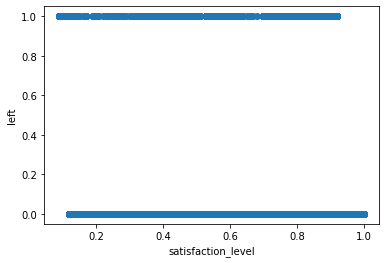

In [5]:
# plot satisfaction level VS left the company
plt.scatter(hr_df.satisfaction_level, hr_df.left)
plt.xlabel('satisfaction_level')
plt.ylabel('left')

In [6]:
# different datatypes
hr_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [7]:
# categorical columns
print(hr_df.Department.unique())
print(hr_df.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [8]:
cat_hr_df = pd.get_dummies(hr_df, columns=['Department','salary'])

In [9]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X = cat_hr_df.drop('left', axis=1)
y = hr_df.left
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [10]:
from sklearn.linear_model import LogisticRegression
# Fit logistic regression model
logistic_model = LogisticRegression(class_weight='balanced')
logistic_model = logistic_model.fit(X_train, y_train)

/Users/rohitsa/Documents/GitHub/SupervisedLearning/supervised-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
# Observe class predictions on test set
y_pred = logistic_model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
from sklearn import metrics
# Print Confusion Matrix
print (metrics.accuracy_score(y_test, y_pred))

0.7595555555555555


In [13]:
from sklearn import metrics
# Print Confusion Matrix
print (metrics.confusion_matrix(y_test, y_pred))

[[2575  863]
 [ 219  843]]


In [14]:
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      3438
           1       0.49      0.79      0.61      1062

    accuracy                           0.76      4500
   macro avg       0.71      0.77      0.72      4500
weighted avg       0.82      0.76      0.78      4500



### Based on the model we can predict 75% times correctly the employee attrition.

### Required more modification for the model like Feature engineering and handle class imbalance
#### As we saw their is class imbalance so we need to handle the class imbalance and train the model.

In [15]:
# distribution of class
cat_hr_df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [16]:
# oversample the lower class
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [17]:
y_smote.value_counts()

1    11428
0    11428
Name: left, dtype: int64

In [18]:
# split train and test
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote,y_smote,train_size=0.7)

In [19]:
from sklearn.linear_model import LogisticRegression
# Fit logistic regression model
logistic_model_smote = LogisticRegression(class_weight='balanced',max_iter=1000)
logistic_model_smote = logistic_model_smote.fit(X_smote_train, y_smote_train)

In [20]:
# Observe class predictions on test set
y_smote_pred = logistic_model_smote.predict(X_smote_test)
y_smote_pred

array([1, 1, 1, ..., 0, 1, 1])

In [21]:
from sklearn import metrics
# Print Confusion Matrix
print (metrics.accuracy_score(y_smote_test, y_smote_pred))

0.7978707889747703


In [22]:
print(metrics.confusion_matrix(y_smote_test, y_smote_pred))

[[2759  728]
 [ 658 2712]]


In [23]:
print(metrics.classification_report(y_smote_test, y_smote_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3487
           1       0.79      0.80      0.80      3370

    accuracy                           0.80      6857
   macro avg       0.80      0.80      0.80      6857
weighted avg       0.80      0.80      0.80      6857



### Based on the new model using oversampling of class we can predict 80% times correctly the employee attrition.